In [37]:
import pickle
import os
from matplotlib import pyplot as plt
folder_path = 'pickles'
subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]
print(subfolders)

['train_lr', 'train_loss', 'val_loss', 'train_H', 'train_acc', 'val_acc']


In [38]:
def getlist(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return data

def plot_local_steps(Lists: list[list], parametes, title):
    dirname = 'plots'
    filename = title + '.png'
    filepath = os.path.join(dirname, filename)
    os.makedirs(dirname, exist_ok=True)
    
    plt.figure(figsize=(10, 6))
    for i, (list, param) in enumerate(zip(Lists, parametes)):
        plt.plot(range(1, len(list) + 1), list, label=f'K{int(param[-1])}')
    plt.xlabel('Epochs')
    plt.ylabel(title)
    plt.title(title+' vs epochs')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(filepath)
    plt.show()

In [39]:
file_to_plot =[
    'pickles/train_acc/slr-1.0_sm-0.0_K-4.pkl',
    'pickles/train_acc/slr-1.0_sm-0.1_K-4.pkl',
    'pickles/train_acc/slr-1.0_sm-0.6_K-4.pkl'
]

list_to_plot = [getlist(file) for file in file_to_plot]
Lists = [[sum(lstx)/len(lstx) for lstx in zip(*listx)] for listx in list_to_plot]

filenames = [file.split('/')[-1][:-4].split('_') for file in file_to_plot]
data = [[float(data.split('-')[1]) for data in filename]for filename in filenames]
print(data)

[[1.0, 0.0, 4.0], [1.0, 0.1, 4.0], [1.0, 0.6, 4.0]]


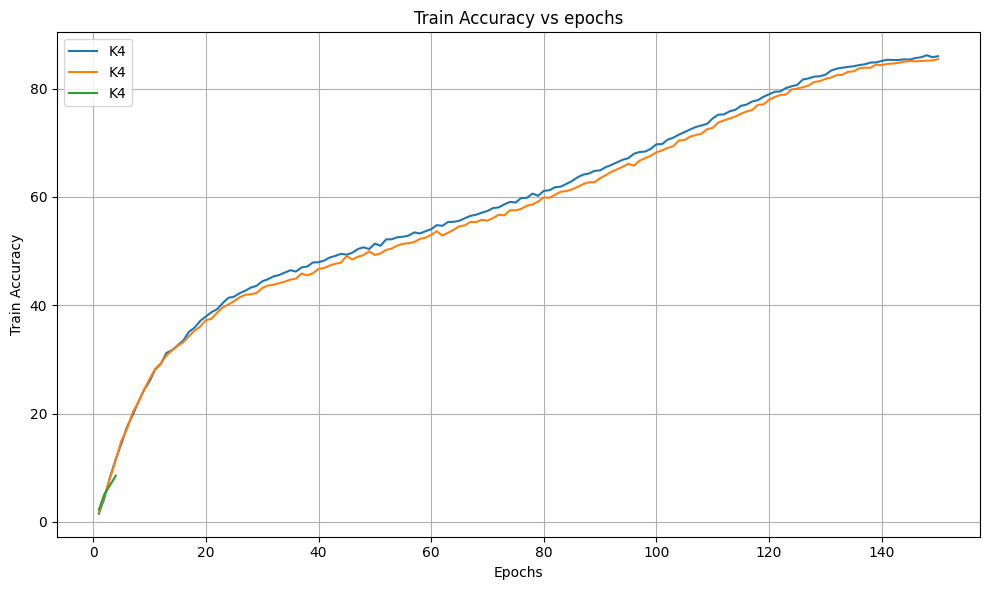

In [40]:
plot_local_steps(Lists, data, 'Train Accuracy')